# Week3授業課題 信用情報を分析しよう

# 1.この課題の目的
- 実データに近いものの分析を行う
- データセットに対して自ら課題を設定できるようにする

# 2.信用情報
Kaggleの Home Credit Default Risk コンペティションを活用し、実データに近いものに対し、自ら課題を設定して分析する練習を行います。

# 【問題1】コンペティション内容の把握
以下の観点に気をつけて、どのようなコンペティションなのかレポートしてください。

- このコンペティションでは何を予測する？目的変数は？
- 企業がこのコンペティションを開催することで得られるメリットは？
- データセットを見る前の段階で考えられる予測結果に影響してきそうなことは？



## このコンペティションでは何を予測する？
- どのようなデータか？　→　ローンを利用し完済または完済できなかった307511人分の債務者の個人情報(特徴量120個)である。
- 何を予測する？　→　それぞれの債務者の各特徴量から、ローンを完済できる確率を予測する。

## 目的変数は？
- application_train.csv のデータの中の左から２列目の「TARGET」が目的変数であり、ローンの完済ができた場合は「0」、完済できなかった場合は「1」が入力されている。

## 企業がこのコンペティションを開催することで得られるメリットは？
- 企業側は必要な情報を入力する事で、新たにローンを組もうとしている人に対して、ローンを完済できる確率がどの程度がを事前に確認でき、不良債権の発生を未然に防ぐことができる。

## データセットを見る前の段階で考えられる予測結果に影響してきそうなことは？
- 債務者のローンの総額、収入、貯金　→　ローンの総額が高く、収入や貯金が低い場合は完済できない可能性が高くなると予想される。

# 3.データセットの準備
データセットはKaggleのページからapplication.csvをダウンロードしてください。

[Home Credit Default Risk | Kaggle](https://www.kaggle.com/c/home-credit-default-risk)

# 【問題2】データの概観
データの概観を把握してください。

（例）
- .head()、.info()、describe()などを使う
- 欠損値の有無を見る
- クラスごとのデータ数をグラフに出す


 コードと表・グラフだけではなく、結果に対する説明や考察も行ってください。

## ①データの個数・データタイプの確認
- 全データの行数列数：307511行122列
- ID列：1個(1列目)
- 目的変数列：1個(2列目)
- 分類するクラスの数：2個(0 or 1)
- 特徴量の個数：120個(3列目〜122列目)
- データタイプ毎の列数：float64：65列, int64：41列, object：16列
- クラス毎のデータ数：TARGET列 0 →282686、TARGET列 1 →24825

In [1]:
# seabornライブラリをインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# テストデータを読み込み、先頭から５行のみ表示
df = pd.read_csv('application_train.csv') # train.csvをデータフレーム形式で読み込んで表示
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
# データの行数を確認
len(df)

307511

In [3]:
# infoメソッドでデータの情報を表示
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
# クラス0(ローンを完済)のデータの行数
len(df[df['TARGET']== 0])

282686

In [5]:
# クラス0(ローンを未完済)のデータの行数
len(df[df['TARGET']== 1])

24825

## ②欠損地の有無を確認
- 複数の特徴量で欠損値を確認

In [6]:
# isnullメソッドを使用し、列ごとの欠損値の数を表示
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

## ③describeメソッドを使用しデータの概要を表示

In [7]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


# 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。
## 課題
1. それぞれの特徴量がどの程度、欠損しているのかを確認する
2. どの特徴量がクラス分類において重要なのかを確認する

## 疑問
1. 各特徴量は相関関係があるのか？
2. 特徴量は120個全てを使用するのか、それとも一部の特徴量を使用した方がよいのか？
3. 一部の特徴量を使用する場合は、どのようにして使用する特徴量を決めるのか？
4. 男性と女性の割合は？
5. 車の所有率は？男性と女性で自動車の所有率は変化するのか？
6. 持ち家を所有している人の割合は？持家が一戸建ての人とアパートの人の割合は？
7. ローン申請時の同伴者はいたか？いた場合はどういう申請者とどのような関係か？
8. ローン申請者の労働者、経営者の割合は？無職の人はいるのか？
9. ローン申請者の最終学歴は？
10. ローン申請者の家族構成は？
11. ローン申請者は

# 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めましょう。過程で新しい疑問点などが生まれた場合は、加えていってください。

課題合格の条件として、表やグラフを 合計15個以上 出力してください。そして、それに対してマークダウンを使い考察を加えていきましょう。



## 課題①「それぞれの特徴量がどの程度、欠損しているのかを確認する」

### 欠損値のある特徴量の個数を確認する
- 欠損値のある列は全120個の特徴量の内、65個(全体の54%)であることを確認

In [8]:
# 欠損値が1個でもある列を削除してdf_dropnaに格納
df_dropna = df.dropna(axis=1)

# 列数を確認
df_dropna.shape

(307511, 55)

### missingnoライブラリにて可視化する
- 全120個の特徴量の内、中央の特徴量で欠損値が多いことを確認

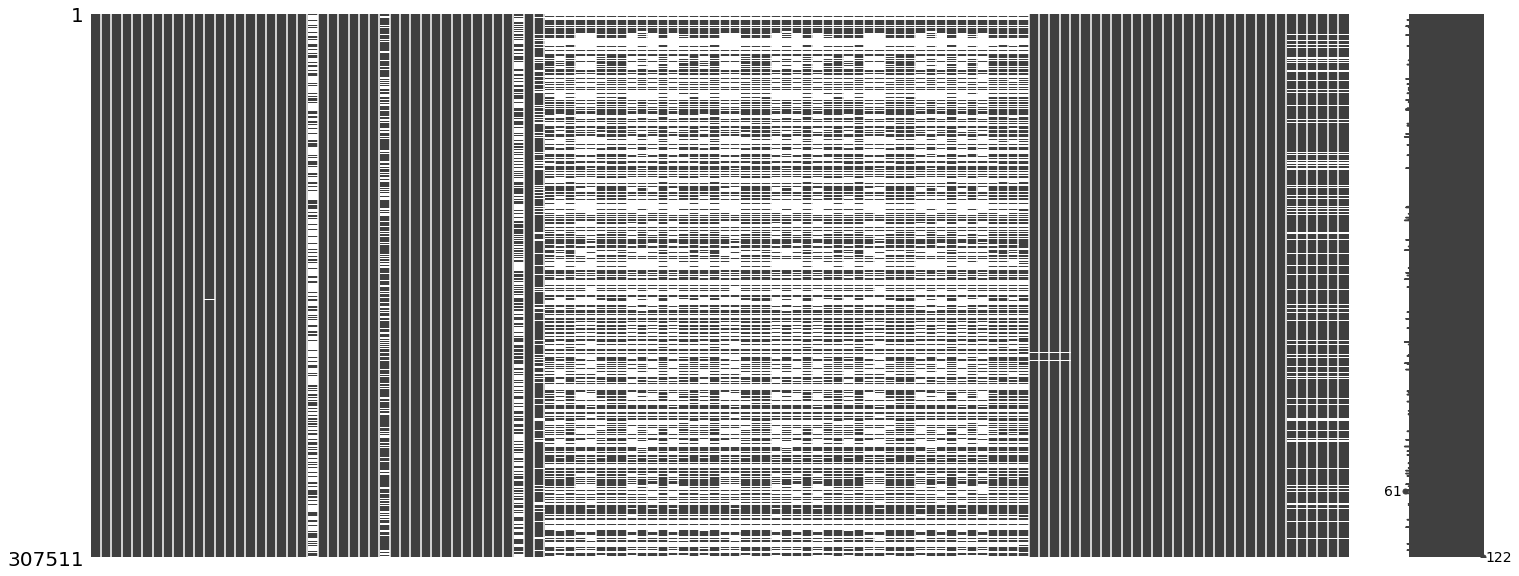

In [9]:
# missingnoライブラリをインポート
import missingno as msno

msno.matrix(df)

### 欠損値の多い中央の特徴量がどのような特徴量かを確認する
- クライアントの住居に関係する特徴量が多く欠損している事を確認

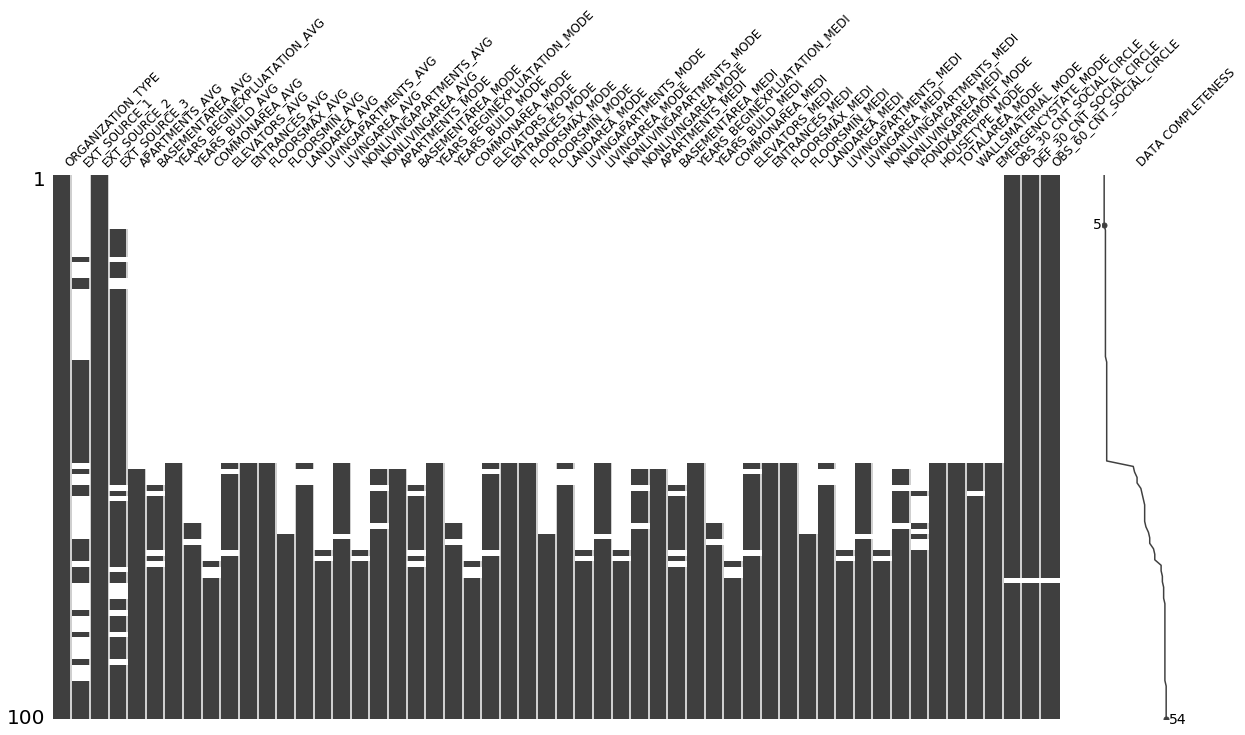

In [10]:
# 先頭100行の内、40～94列目の特徴量を欠損値の有無を表示
msno.matrix(df.iloc[0:100, 40:94],inline=True, 
            sparkline=True, figsize=(20,10), sort='ascending', 
            fontsize=12, labels=True)

### 列ごとの欠損値の割合は？

In [11]:
# 各列の欠損値の数を計算しmis_valに格納
mis_val = df.isnull().sum()

# 各列の欠損値の数の割合を計算しmis_val_percentに格納
mis_val_percent = 100 * df.isnull().sum() / len(df)

#上記の2つのデータを横に結合
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

# columns_nameを設定
mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

# 欠損値の割合で降順にソートする
mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

# 欠損値の割合が高い特徴量20個を抽出
mis_val_table_ren_columns[:20]

SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
dtype: int64

### テストデータも学習用データと同様の欠損値の割合か？
- テストデータも学習データと同様の特徴量が同じ程度欠損している事を確認

In [15]:
# train.csvをデータフレーム形式で読み込んで表示
df_test = pd.read_csv('application_test.csv') 
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# trainデータの各特徴量の欠損値の割合を計算し、インデックスを再割り付け
miss_train = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
miss_train.head()

,index,0
0,SK_ID_CURR,0.0
1,TARGET,0.0
2,NAME_CONTRACT_TYPE,0.0
3,CODE_GENDER,0.0
4,FLAG_OWN_CAR,0.0


In [17]:
# testデータの各特徴量の欠損値の割合を計算し、インデックスを再割り付け
miss_test = pd.DataFrame((df_test.isnull().sum())*100/df_test.shape[0]).reset_index()
miss_test.head()

,index,0
0,SK_ID_CURR,0.0
1,NAME_CONTRACT_TYPE,0.0
2,CODE_GENDER,0.0
3,FLAG_OWN_CAR,0.0
4,FLAG_OWN_REALTY,0.0


In [18]:
# miss_trainデータにクラス分け用のデータを追加
miss_train["type"] = "train"
miss_train.head()

,index,0,type
0,SK_ID_CURR,0.0,train
1,TARGET,0.0,train
2,NAME_CONTRACT_TYPE,0.0,train
3,CODE_GENDER,0.0,train
4,FLAG_OWN_CAR,0.0,train


In [19]:
# miss_trainデータにクラス分け用のデータを追加
miss_test["type"]  =  "test"
miss_test.head()

,index,0,type
0,SK_ID_CURR,0.0,test
1,NAME_CONTRACT_TYPE,0.0,test
2,CODE_GENDER,0.0,test
3,FLAG_OWN_CAR,0.0,test
4,FLAG_OWN_REALTY,0.0,test


In [20]:
# miss_trainとmiss_testを縦に結合
missing = pd.concat([miss_train,miss_test],axis=0)
missing.head()

,index,0,type
0,SK_ID_CURR,0.0,train
1,TARGET,0.0,train
2,NAME_CONTRACT_TYPE,0.0,train
3,CODE_GENDER,0.0,train
4,FLAG_OWN_CAR,0.0,train


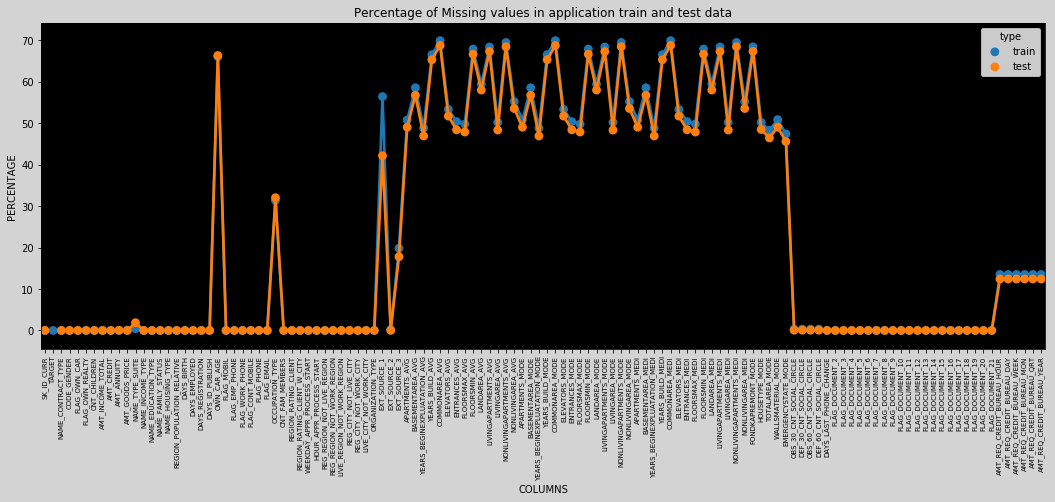

In [21]:
# pointplotメソッドにて表示
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot("index",0,data=missing,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application train and test data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

## 課題「どの特徴量がクラス分類において重要なのかがわからない。」→以下の評価値を確認して重要な特徴量を検討する。

### 目的変数との相関係数

In [22]:
# corrメソッドにて特徴量毎の相関係数を求める
df_corr = df.corr(method='pearson')
df_corr.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,...,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,...,0.003130,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,...,0.034329,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448


In [23]:
# 目的変数TARGET列のCNT_CHILDREN行から下を抽出する
df_corr_target = df_corr.loc['CNT_CHILDREN':,'TARGET']
df_corr_target.head()

CNT_CHILDREN        0.019187
AMT_INCOME_TOTAL   -0.003982
AMT_CREDIT         -0.030369
AMT_ANNUITY        -0.012817
AMT_GOODS_PRICE    -0.039645
Name: TARGET, dtype: float64

In [24]:
# absメソッドにて絶対値とし、その状態でsort_valuesメソッドで降順にソートする
df_corr_target_sort = df_corr_target.abs().sort_values(ascending = False) 

# 上位10個の特徴量名を格納
top10_index = df_corr_target_sort[:10].index

top10_index

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY',
       'FLAG_EMP_PHONE'],
      dtype='object')

### 目的変数と相関係数の絶対値が高い特徴量上位10個

In [57]:
# 上位10個のデータを取得
top10 = df_corr_target[top10_index]
top10_df = pd.DataFrame(top10)
top10_df

,TARGET
EXT_SOURCE_3,-0.178919
EXT_SOURCE_2,-0.160472
EXT_SOURCE_1,-0.155317
DAYS_BIRTH,0.078239
REGION_RATING_CLIENT_W_CITY,0.060893
REGION_RATING_CLIENT,0.058899
DAYS_LAST_PHONE_CHANGE,0.055218
DAYS_ID_PUBLISH,0.051457
REG_CITY_NOT_WORK_CITY,0.050994
FLAG_EMP_PHONE,0.045982


### 目的変数と相関係数の高い特徴量10個のヒートマップ	
- EXT_SOURCE_1 → DAYS_BIRTHと負の相関(-0.600610)	
- FLAG_EMP_PHONE → DAYS_BIRTHと負の相関(0.619888)
- ヒートマップ全体を見る限りでは特徴量間で相関関係はないように見られる

In [26]:
# 上位10個の特徴量の相関係数行列
top10_corr = df[top10_index].corr(method='pearson')
top10_corr

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE
EXT_SOURCE_3,1.000000,0.109167,0.186846,-0.205478,-0.012158,-0.012903,-0.075256,-0.131597,-0.079729,-0.115293
EXT_SOURCE_2,0.109167,1.000000,0.213982,-0.091996,-0.288299,-0.292895,-0.195764,-0.050955,-0.075970,0.019459
EXT_SOURCE_1,0.186846,0.213982,1.000000,-0.600610,-0.115374,-0.115341,-0.132607,-0.132375,-0.185953,-0.294147
DAYS_BIRTH,-0.205478,-0.091996,-0.600610,1.000000,0.008073,0.009361,0.082939,0.272691,0.242401,0.619888
REGION_RATING_CLIENT_W_CITY,-0.012158,-0.288299,-0.115374,0.008073,1.000000,0.950842,0.025717,-0.007737,0.028081,-0.034712
REGION_RATING_CLIENT,-0.012903,-0.292895,-0.115341,0.009361,0.950842,1.000000,0.026022,-0.005103,0.008360,-0.032871
DAYS_LAST_PHONE_CHANGE,-0.075256,-0.195764,-0.132607,0.082939,0.025717,0.026022,1.000000,0.088576,0.046788,-0.021103
DAYS_ID_PUBLISH,-0.131597,-0.050955,-0.132375,0.272691,-0.007737,-0.005103,0.088576,1.000000,0.099354,0.273611
REG_CITY_NOT_WORK_CITY,-0.079729,-0.075970,-0.185953,0.242401,0.028081,0.008360,0.046788,0.099354,1.000000,0.256427
FLAG_EMP_PHONE,-0.115293,0.019459,-0.294147,0.619888,-0.034712,-0.032871,-0.021103,0.273611,0.256427,1.000000


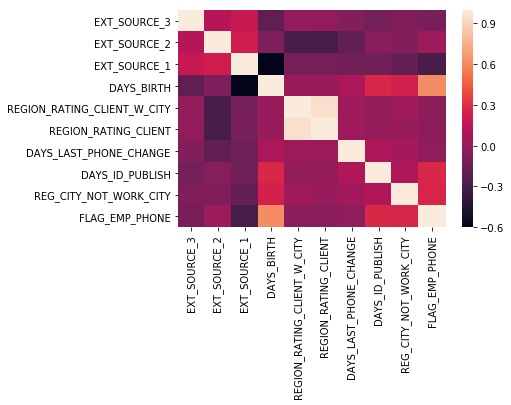

In [27]:
# ヒートマップを表示
sns.heatmap(top10_corr)

### 特徴量のデンドログラムの表示

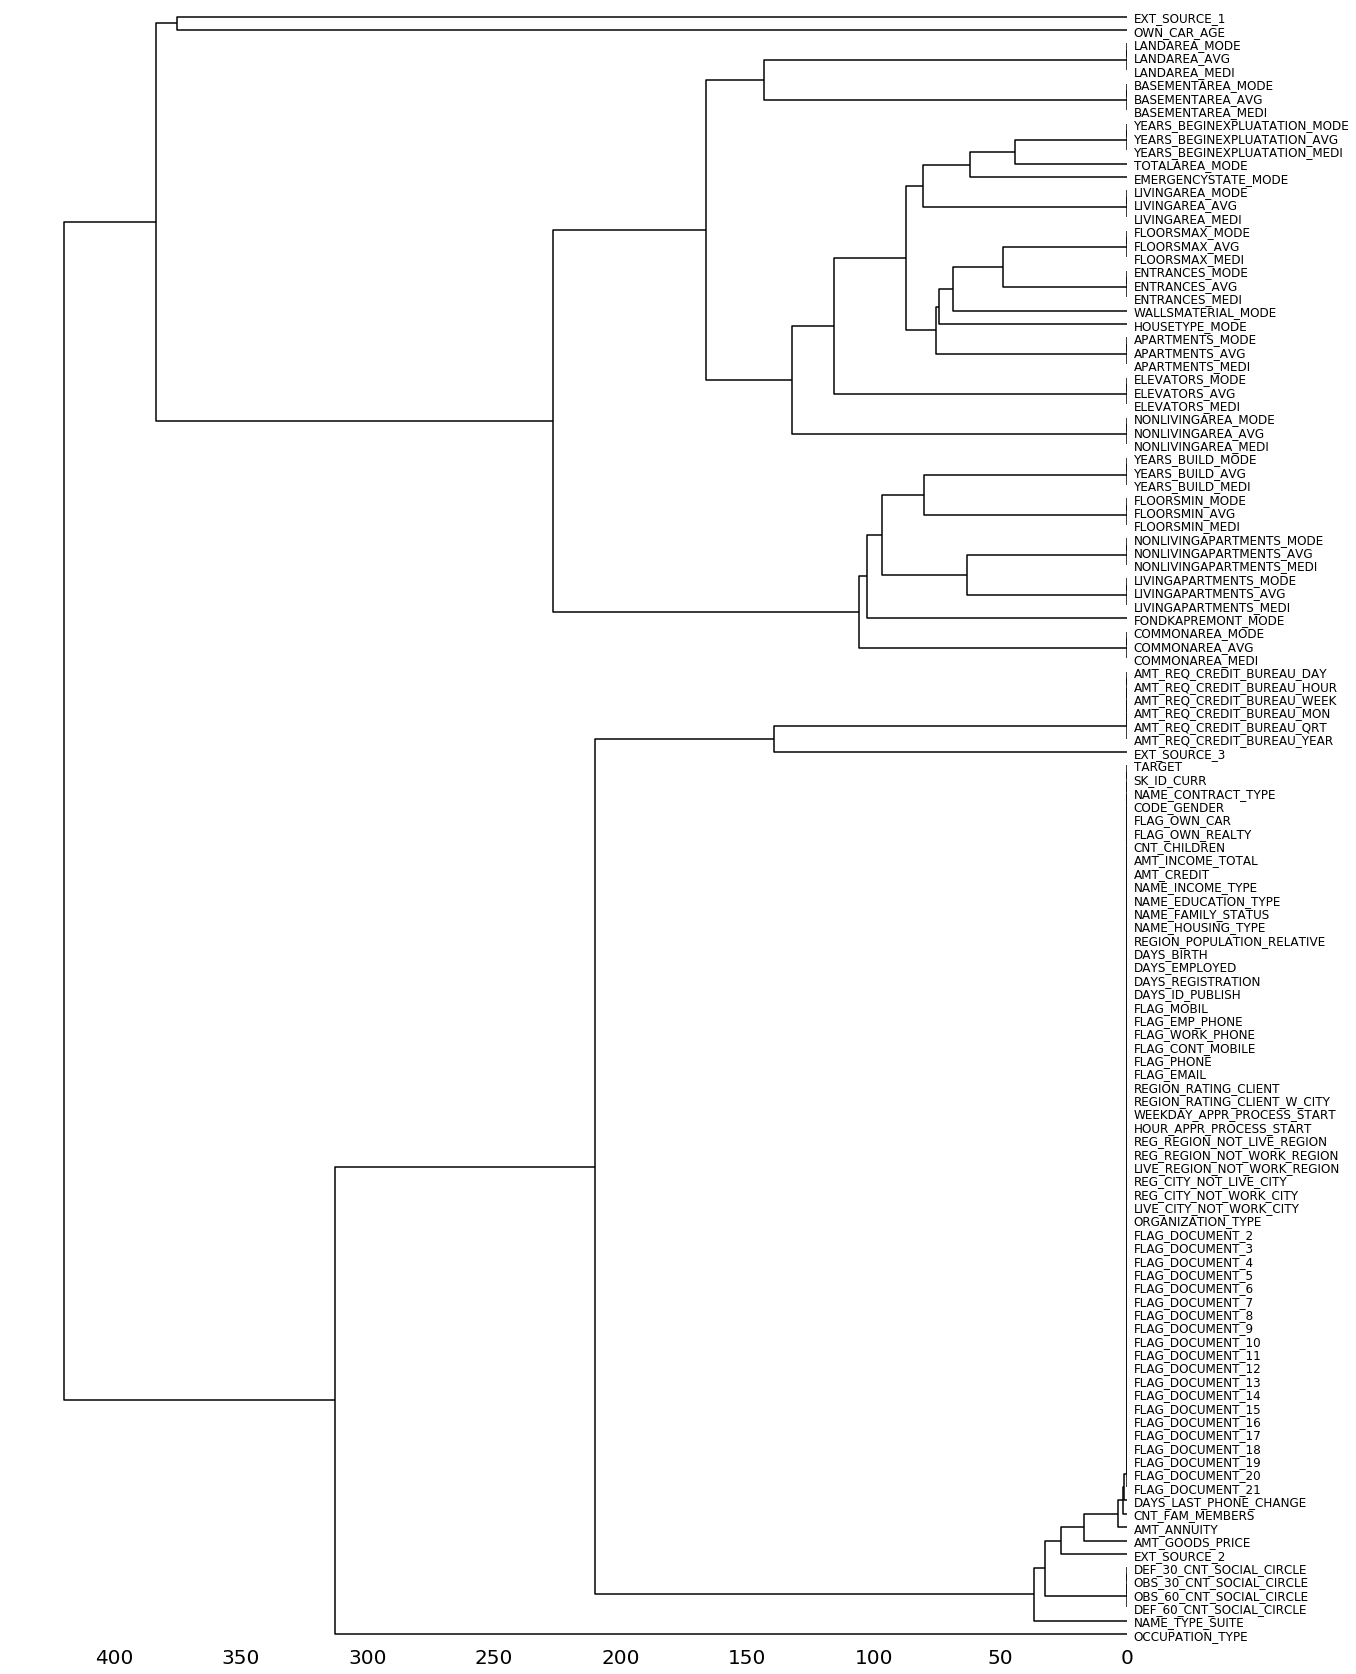

In [59]:
# dendrogramメソッドを設定
msno.dendrogram(df, inline=True, fontsize=12, figsize=(20,30))

### 男性と女性の割合は？
- trainデータとtestデータで男女の割合はそれぞれ1%の差があるのみで割合に大きな違いはない

Text(0.5, 1.0, 'distribution of gender in test data')

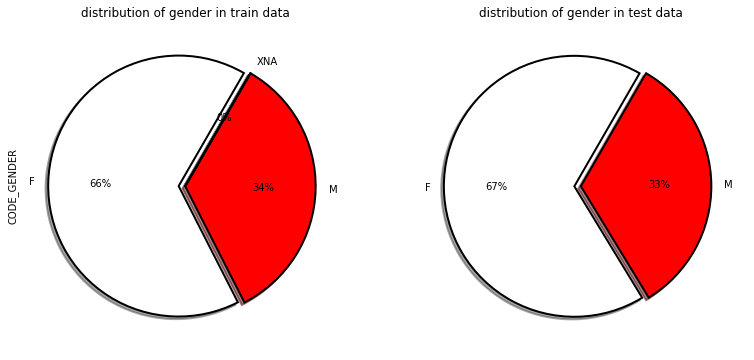

In [58]:
# figureオブジェクトを設定
fig = plt.figure(figsize=(13,6))

# サブプロットを設定
plt.subplot(121)

# pieメソッドを設定
df["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",
                                          colors = ["white","r"],startangle = 60,
                                          wedgeprops={"linewidth":2,"edgecolor":"k"},
                                          explode=[.05,0,0],
                                          shadow =True)

# titleを設定
plt.title("distribution of gender in train data")

# サブプロットを設定
plt.subplot(122)

# pieメソッドを設定
df_test["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",
                                               colors = ["white","r"],
                                               startangle = 60,
                                               wedgeprops={"linewidth":2,"edgecolor":"k"},
                                               explode=[.05,0],
                                               shadow =True)
# ylabelを設定
plt.ylabel("")
# titleを設定
plt.title("distribution of gender in test data")

### ⑥車の所有率は？男性と女性で自動車の所有率は変化するのか？
- 自動車の所有率は34%、その中で男性は57%、女性は43%

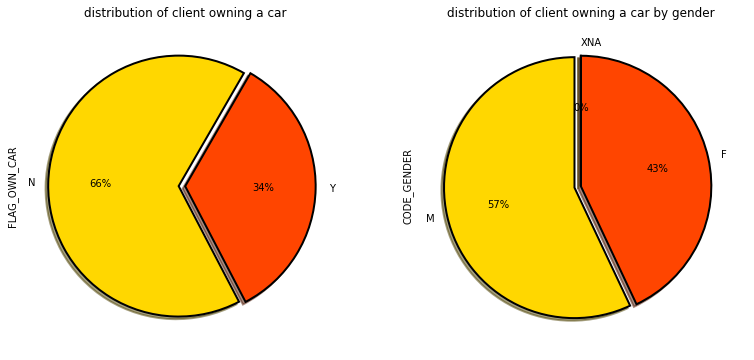

In [33]:
# figureオブジェクトを設定
fig = plt.figure(figsize=(13,6))

# サブプロットを設定
plt.subplot(121)

# pieメソッドを設定
df["FLAG_OWN_CAR"].value_counts().plot.pie(autopct = "%1.0f%%",
                                           colors = ["gold","orangered"],
                                           startangle = 60,
                                           wedgeprops={"linewidth":2,"edgecolor":"k"},
                                           explode=[.05,0],
                                           shadow =True)

# titleを設定
plt.title("distribution of client owning a car")

# サブプロットを設定
plt.subplot(122)

# pieメソッドを設定
df[df["FLAG_OWN_CAR"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                                     colors = ["gold","orangered"],startangle = 90,
                                                                     wedgeprops={"linewidth":2,"edgecolor":"k"},
                                                                     explode=[.05,0,0],
                                                                     shadow =True)

# titleを設定
plt.title("distribution of client owning a car by gender")
# グラフを表示
plt.show()

### 持ち家を所有している人の割合は？持家が一戸建ての人とアパートの人の割合は？
- 家かアパートの所有率は31%、その内、男性は67%、女性は33%

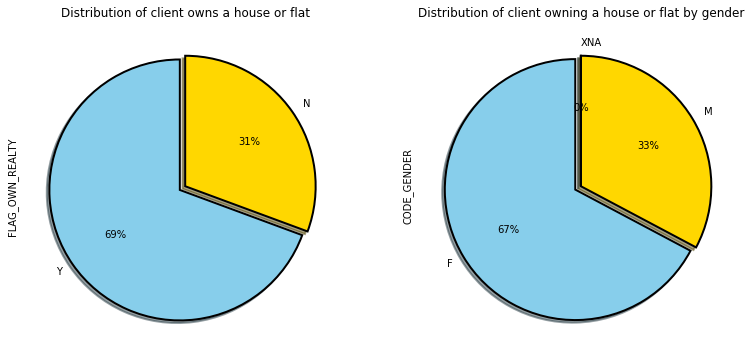

In [36]:
# figureオブジェクトを設定
plt.figure(figsize=(13,6))

# サブプロットを設定
plt.subplot(121)

# pieメソッドを設定
df["FLAG_OWN_REALTY"].value_counts().plot.pie(autopct = "%1.0f%%",
                                              colors = ["skyblue","gold"],
                                              startangle = 90,
                                              wedgeprops={"linewidth":2,"edgecolor":"k"},
                                              explode=[0.05,0],shadow =True)

# titleを設定
plt.title("Distribution of client owns a house or flat")

# サブプロットを設定
plt.subplot(122)

# pieメソッドを設定
df[df["FLAG_OWN_REALTY"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                                        colors = ["skyblue","gold"],
                                                                        startangle = 90,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},
                                                                        explode=[.05,0,0],
                                                                        shadow =True)

# titleを設定
plt.title("Distribution of client owning a house or flat by gender")
# グラフを表示
plt.show()

### ⑧ローン申請時の同伴者はいたか？いた場合はどういう申請者とどのような関係か？
- 申請者の8割が申請時に同伴者はいない
- 同伴者がを連れた場合は、家族、スポンサー、子供の順に多い

Text(0.5, 1.0, 'Distribution of Suite type')

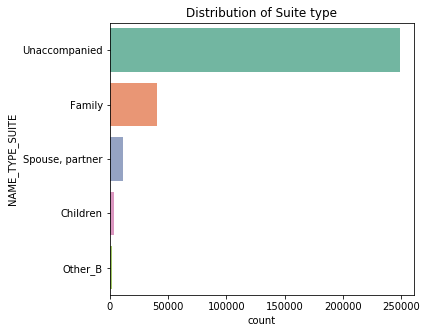

In [38]:
# figureオブジェクトを設定
plt.figure(figsize=(12,5))

# サブプロットを設定
plt.subplot(121)

# countplotメソッドを設定
sns.countplot(y=df["NAME_TYPE_SUITE"],
              palette="Set2",
              order=df["NAME_TYPE_SUITE"].value_counts().index[:5])

# titleを設定
plt.title("Distribution of Suite type")

In [40]:
50000/307511

0.16259580958079548

### ⑨ローン申請者の労働者、経営者の割合は？無職の人はいるのか？
- 全体の50%程度が一般企業の労働者、20%が経営者、15％が年金受給者、6%が国家公務員

Text(0.5, 1.0, 'Distribution of client income type')

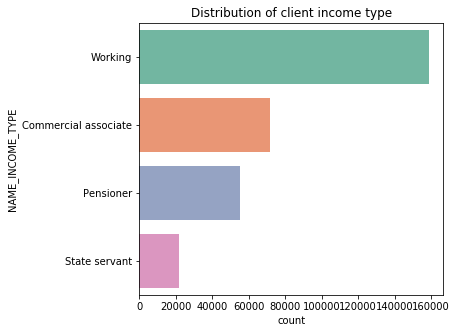

In [47]:
# figureオブジェクトを設定
plt.figure(figsize=(12,5))

# サブプロットを設定
plt.subplot(121)

# countplotメソッドを設定
sns.countplot(y=df["NAME_INCOME_TYPE"],
              palette="Set2",
              order=df["NAME_INCOME_TYPE"].value_counts().index[:4])

# titleを設定
plt.title("Distribution of client income type")

In [52]:
20000/307511

0.0650383238323182

### ⑩ローン申請者の最終学歴は？
- ローン未完済の人は最終学歴が中等教育までの割合が9%程度高く、それに伴い高等教育までの割合が9%低い
- 最終学歴が学士以上の割合は、ローン完済者、未完済者ともに同程度

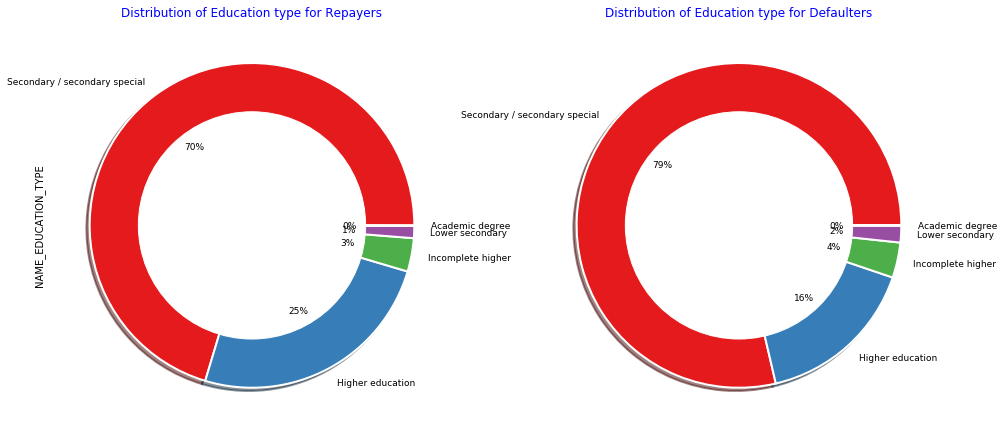

In [53]:
# figureオブジェクトを設定
plt.figure(figsize=(16,8))

# サブプロットを設定
plt.subplot(121)

# pieメソッドを設定
df[df["TARGET"]==0]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=9,autopct = "%1.0f%%",
                                                                   colors = sns.color_palette("Set1"),
                                                                   wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

# Circleメソッドを設定
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)

# titleを設定
plt.title("Distribution of Education type for Repayers",color="b")

# サブプロットを設定
plt.subplot(122)

# pieメソッドを設定
df[df["TARGET"]==1]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=9,
                                                                   autopct = "%1.0f%%",
                                                                   colors = sns.color_palette("Set1"),
                                                                   wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
# Circleメソッドを設定
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)

# titleを設定
plt.title("Distribution of Education type for Defaulters",color="b")
# ylabelを設定
plt.ylabel("")
# グラフを表示
plt.show()

### ⑪ローン申請者の家族構成は？
- ローン未完済者は民事婚と独身者の割合が、ローン完済者と比較し3～4%多い

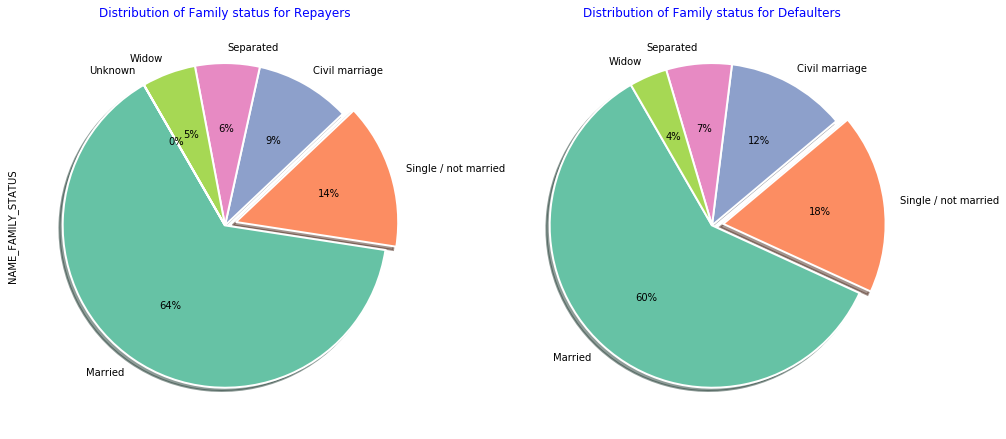

In [55]:
# figureオブジェクトを設定
plt.figure(figsize=(16,8))

# サブプロットを設定
plt.subplot(121)

# pieメソッドを設定
df[df["TARGET"]==0]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                                  startangle=120,colors = sns.color_palette("Set2",7),
                                                                  wedgeprops={"linewidth":2,"edgecolor":"white"},
                                                                  shadow =True,explode=[0,.07,0,0,0,0])

# titleを設定
plt.title("Distribution of Family status for Repayers",color="b")

# サブプロットを設定
plt.subplot(122)

# pieメソッドを設定
df[df["TARGET"]==1]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                                  startangle=120,colors = sns.color_palette("Set2",7),
                                                                  wedgeprops={"linewidth":2,"edgecolor":"white"},
                                                                  shadow =True,explode=[0,.07,0,0,0])

# titleを設定
plt.title("Distribution of Family status for Defaulters",color="b")
# ylabelを設定
plt.ylabel("")
# グラフを表示
plt.show()